In [4]:
%load_ext autoreload
%autoreload 2
from vulcan import utils

import matplotlib.pyplot as plt

from fibsem import utils as fibsem_utils
from fibsem import milling, calibration, acquire, movement
from fibsem.structures import MillingSettings, BeamType
from autoscript_sdb_microscope_client.structures import BitmapPatternDefinition
import vulcan
import os

# path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\gigachad.bmp"
# path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration\1e-06_rect.bmp"


BASE_PATH = os.path.dirname(vulcan.__file__)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
microscope, settings = fibsem_utils.setup_session(
    config_path=os.path.join(BASE_PATH, "config"), 
    protocol_path=os.path.join(BASE_PATH, "protocol.yaml"))

2022-10-11 10:26:53,140 — root — INFO — connect_to_microscope:31 — Microscope client connecting to [10.0.0.1]
2022-10-11 10:26:53,148 — root — INFO — connect_to_microscope:34 — Microscope client connected to [10.0.0.1]
2022-10-11 10:26:53,149 — root — INFO — setup_session:252 — Finished setup for session: vulcan_demo_2022-10-11.10-26-53AM


Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]


# 200nA
p:1um
o: 0.58
o_step: 0.58um
gap: 0.29um
offset: 0.145um



# 60nA
p: 0.2um
o: 0.87
ostep: 0.74um
gap: 0.087um
cos : 0.0435



p: 0.65um
o: 0.58
ostep: 0.377
gap: 0.1885
cos: 0.09425


eq:
p = pitch (pixelsize)
o = overlap (percentage)
o_step: beam step size (pitch * overlap)
gap: o_step / 2
cos: gap / 2


In [5]:
settings.image.beam_type = BeamType.ION
ib_image = acquire.new_image(microscope, settings.image)

2022-10-11 10:27:41,242 — root — INFO — autocontrast:27 — automatically adjusting contrast...
2022-10-11 10:27:43,602 — root — INFO — acquire_image:186 — acquiring new ION image.
2022-10-11 10:27:45,523 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Ion | 46.943 | 1.469


In [9]:
mill_settings = MillingSettings(10e-6, 10e-6, 1e-6)
pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)

print(pattern.id)

# plt.imshow(ib_image.thumbnail)
# plt.show()

1170


In [36]:
# ret = 2**2
a, b = 2,-3 
c = int.__pow__(a, b)

print(a, type(a))
print(b, type(b))
print(c, type(c))



2 <class 'int'>
-3 <class 'int'>
0.125 <class 'float'>


In [3]:
0.65*0.58 / 2

0.1885

In [4]:
0.87*0.2 # pitch

0.17400000000000002

2022-10-11 11:07:49,481 — root — INFO — setup_milling:35 — setup ion beam milling
2022-10-11 11:07:49,482 — root — INFO — setup_milling:36 — application file:  Si, pattern mode: Serial, hfw: 8e-05


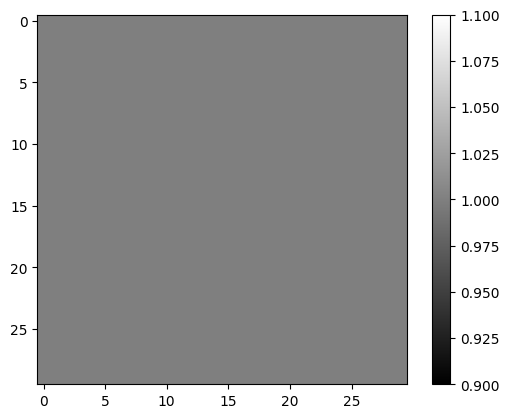

In [38]:
milling.setup_milling(
    microscope, 
    application_file=settings.system.application_file,
    hfw=80e-6
)

microscope.patterning.clear_patterns()

import numpy as np

# profile pattern
# np_path = r"C:\Users\Admin\Github\vulcan\vulcan\vulcan_demo_2022-10-07.03-03-00PM\stitch_profile.npy"
# arr = np.load(np_path)

arr = np.ones(shape=(30, 30))

path  = r"C:\Users\Admin\Github\vulcan\vulcan\vulcan_demo_2022-10-10.03-14-48PM/stitch_profile.bmp"
arr = utils.transform_profile(arr, invert=False, rotate=False)
plt.imshow(arr, cmap="gray")
plt.colorbar()
plt.show()
utils.save_profile_to_bmp(arr, path)

width = 20e-6
offset = 1.5e-6

n_iteration = 300


In [80]:
milling.setup_milling(
    microscope, 
    application_file=settings.system.application_file,
    hfw=80e-6
)
# surface milling
mill_settings = MillingSettings(centre_x = -width/2 - offset, width =width, height=20e-6, depth=0.6e-6)
rect_pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)


milling.run_milling(microscope, milling_current=60e-9)

2022-10-10 16:48:09,658 — root — INFO — run_milling:60 — running ion beam milling now... asynchronous=False


In [81]:
calibration.auto_discharge_beam(microscope, settings.image, n_iterations=n_iteration)

2022-10-10 16:48:27,051 — root — INFO — auto_discharge_beam:141 — Bring me Thanos!
2022-10-10 16:48:27,059 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:48:27,616 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 13.600 | 1.000
2022-10-10 16:48:27,623 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:48:27,959 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 10.768 | 1.000
2022-10-10 16:48:27,965 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:48:28,345 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 8.737 | 1.000
2022-10-10 16:48:28,350 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:48:28,708 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 6.560 | 1.000
2022-10-10 16:48:28,714 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:48:29,065 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 4.663 | 1

In [50]:
milling.setup_milling(
    microscope, 
    application_file=settings.system.application_file,
    hfw=80e-6
)

# surface milling
# mill_settings = MillingSettings(centre_x = -width/2 - offset, width =width, height=20e-6, depth=0.6e-6)
# rect_pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)


# mill_settings = MillingSettings(centre_x = +width/2 + offset, width=width, height=20e-6, depth=0.6e-6)
# rect_pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)

# # bmp milling
# bitmap_pattern  =  BitmapPatternDefinition.load(path)
# mill_settings = MillingSettings(centre_x = -width/2 - offset, width =width, height=20e-6, depth=2e-6)
# pattern1 = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)
# pattern1.scan_direction = "RightToLeft"

# pattern1.scan_direction = "DynamicAllDirections"


bitmap_pattern  =  BitmapPatternDefinition.load(path)
mill_settings = MillingSettings(centre_x = +width/2 + offset, width=width, height=20e-6, depth=2e-6)
pattern2 = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)
pattern2.scan_direction = "LeftToRight"
# pattern2.scan_direction = "DynamicAllDirections"


microscope.patterning.mode = "Serial"

# milling.run_milling(microscope, milling_current=60e-9, asynch=True)

    

2022-10-11 11:51:23,747 — root — INFO — setup_milling:35 — setup ion beam milling
2022-10-11 11:51:23,748 — root — INFO — setup_milling:36 — application file:  Si, pattern mode: Serial, hfw: 8e-05


In [79]:
milling.setup_milling(
    microscope, 
    application_file=settings.system.application_file,
    hfw=80e-6
)

# total
total_width = 40e-6

# pattern
width = 20e-6
height = 20e-6
depth = 0.6e-6
bitmap_depth = 1e-6


STEP_SIZE = width / 2
N_STEPS = 3
centre_x = - (N_STEPS - 1) * STEP_SIZE


mill_settings = MillingSettings(centre_x = 0 , width = total_width, height=height, depth=depth)
rect_pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)

for i in range(N_STEPS):

    centre_x += STEP_SIZE

    bitmap_pattern  =  BitmapPatternDefinition.load(path)
    mill_settings = MillingSettings(centre_x = centre_x, width=width, height=height, depth=bitmap_depth)
    pattern2 = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)
    pattern2.scan_direction = "LeftToRight"


2022-10-11 12:21:46,847 — root — INFO — setup_milling:35 — setup ion beam milling
2022-10-11 12:21:46,848 — root — INFO — setup_milling:36 — application file:  Si, pattern mode: Serial, hfw: 8e-05


In [100]:
import time 

t0 = time.time()
n_iteration = 300
calibration.auto_discharge_beam(microscope, settings.image, n_iterations=n_iteration)
t1 = time.time()

elapsed = t1 - t0

2022-10-10 17:19:44,826 — root — INFO — auto_discharge_beam:141 — Bring me Thanos!
2022-10-10 17:19:44,833 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 17:19:45,534 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -97.856 | 0.150
2022-10-10 17:19:45,540 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 17:19:45,882 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -97.688 | 0.150
2022-10-10 17:19:45,888 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 17:19:46,235 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -97.577 | 0.150
2022-10-10 17:19:46,240 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 17:19:46,579 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -97.524 | 0.150
2022-10-10 17:19:46,585 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 17:19:46,931 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -97

In [80]:
ib_image1 = acquire.new_image(microscope, settings.image)
movement.move_stage_relative_with_corrected_movement(
    microscope,
    settings,
    dx=100e-6,
    dy=0,
    beam_type=BeamType.ION
)

ib_image2 = acquire.new_image(microscope, settings.image)

movement.move_stage_relative_with_corrected_movement(
    microscope,
    settings,
    dx=-100e-6,
    dy=0,
    beam_type=BeamType.ION
)

ib_image3 = acquire.new_image(microscope, settings.image)


fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(ib_image1.data, cmap="gray")
ax[1].imshow(ib_image2.data, cmap="gray")
ax[2].imshow(ib_image3.data, cmap="gray")
plt.show()



0

In [66]:
print("elapsed: ", elapsed)

elapsed:  107.11000752449036


In [68]:

import winsound

wait_time = 1
time.sleep(wait_time)
winsound.Beep(500, 1000)


In [101]:

beam_current = microscope.beams.ion_beam.beam_current.value
settings.image.resolution = "1536x1024"
settings.image.save_path = r"C:\Users\Admin\Github\vulcan\vulcan\vulcan_demo_2022-10-10.03-14-48PM"
settings.image.beam_type = BeamType.ELECTRON
settings.image.hfw = 60e-6
settings.image.save = True
# settings.image.label = f"stitch_{beam_current:.2e}_offset_{offset*1e6}_dis_{elapsed:.2f}_wait_{wait_time}_p1"
settings.image.label = "stitch_baseline-dynamic-all-directions2"
image = acquire.new_image(microscope, settings.image)

2022-10-10 17:24:05,464 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 17:24:06,145 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -80.015 | 0.200


In [86]:
milling.setup_milling(
    microscope, 
    application_file=settings.system.application_file,
    hfw=80e-6
)

mill_settings = MillingSettings(centre_x = +width/2 + offset, width=width, height=20e-6, depth=0.6e-6)
rect_pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)

milling.run_milling(microscope, milling_current=60e-9)


2022-10-10 16:54:10,508 — root — INFO — setup_milling:35 — setup ion beam milling
2022-10-10 16:54:10,508 — root — INFO — setup_milling:36 — application file:  Si, pattern mode: Serial, hfw: 8e-05
2022-10-10 16:54:10,863 — root — INFO — run_milling:60 — running ion beam milling now... asynchronous=False


In [87]:
calibration.auto_discharge_beam(microscope, settings.image, n_iterations=n_iteration)

2022-10-10 16:54:51,811 — root — INFO — auto_discharge_beam:141 — Bring me Thanos!
2022-10-10 16:54:51,817 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:54:52,393 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -12.882 | 1.000
2022-10-10 16:54:52,398 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:54:52,745 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -12.455 | 1.000
2022-10-10 16:54:52,750 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:54:53,091 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -12.471 | 1.000
2022-10-10 16:54:53,097 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:54:53,429 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -12.092 | 1.000
2022-10-10 16:54:53,435 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:54:53,775 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -11

In [88]:
milling.setup_milling(
    microscope, 
    application_file=settings.system.application_file,
    hfw=80e-6
)

bitmap_pattern  =  BitmapPatternDefinition.load(path)
mill_settings = MillingSettings(centre_x = +width/2 + offset, width=width, height=20e-6, depth=2e-6)
pattern2 = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)
pattern2.scan_direction = "LeftToRight"

microscope.patterning.mode = "Serial"

milling.run_milling(microscope, milling_current=60e-9)


2022-10-10 16:56:43,672 — root — INFO — setup_milling:35 — setup ion beam milling
2022-10-10 16:56:43,673 — root — INFO — setup_milling:36 — application file:  Si, pattern mode: Serial, hfw: 8e-05
2022-10-10 16:56:44,036 — root — INFO — run_milling:60 — running ion beam milling now... asynchronous=False


In [89]:
calibration.auto_discharge_beam(microscope, settings.image, n_iterations=n_iteration)

2022-10-10 16:57:24,080 — root — INFO — auto_discharge_beam:141 — Bring me Thanos!
2022-10-10 16:57:24,086 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:57:24,640 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 26.266 | 1.000
2022-10-10 16:57:24,646 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:57:24,992 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 23.825 | 1.000
2022-10-10 16:57:24,997 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:57:25,361 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 21.163 | 1.000
2022-10-10 16:57:25,367 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:57:25,709 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 18.866 | 1.000
2022-10-10 16:57:25,715 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:57:26,085 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 16.447 

In [90]:
from fibsem import acquire
from fibsem.structures import BeamType

beam_current = microscope.beams.ion_beam.beam_current.value
settings.image.resolution = "1536x1024"
settings.image.save_path = r"C:\Users\Admin\Github\vulcan\vulcan\vulcan_demo_2022-10-10.03-14-48PM"
settings.image.beam_type = BeamType.ELECTRON
settings.image.hfw = 60e-6
settings.image.save = True
settings.image.label = f"stitch_{beam_current:.2e}_offset_{offset*1e6}_dis_{elapsed:.2f}_wait_{wait_time}_p2_topdown"
image = acquire.new_image(microscope, settings.image)

2022-10-10 16:59:13,551 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-10 16:59:14,241 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 57.480 | 1.575


### Calibration

Resolution vs Depth

How does changing the resolution of the bitmap pattern affect the depth?

In [ ]:
milling.setup_milling(
    microscope, 
    application_file=settings.system.application_file,
    hfw=400e-6
)

In [ ]:
# paths = range(4)
# paths = [r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration\1e-06_profile.bmp"]
# r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration\1e-06_rect.bmp"]



microscope.patterning.clear_patterns()

width = 800e-6
height = 400e-6
depth = 5e-6
offset = 0e-6
center_x = 0
center_y = -(len(paths) - 1) / 2 * (height + offset) 

mill_settings = MillingSettings(centre_x=center_x, centre_y=0, 
    width=width, 
    height=height, 
    depth=600e-9)

pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)


for path in paths:

    # profile pattern
    bitmap_pattern  =  BitmapPatternDefinition.load(path)
    mill_settings = MillingSettings(centre_x=center_x, centre_y=center_y, width=width, height=height, depth=depth)
    pattern = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)

    print(mill_settings)

    center_y +=  height + offset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# np_path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration/1e-06_profile.npy"
np_path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\lens_lowres_half.npy"
arr = np.load(np_path)

print(arr.shape)
plt.plot(arr[0])
plt.show()

# dirname = os.path.dirname(np_path)
# fname = os.path.basename(np_path).split(".")[0]
# fname = np_path.replace("npy", "bmp")
# print(fname)

arr = utils.transform_profile(arr, invert=True, rotate=False)
utils.save_profile_to_bmp(arr, fname)

In [ ]:
print("30x: ", arr.shape[1] * 30)
print("100x (10nm): ", arr.shape[1] * 100)
print("1000x (1nm): ", arr.shape[1] * 1000)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import tifffile as tf
import numpy as np

path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\helloworld.tif"

utils.convert_tif_to_bmp(path, "pattern.bmp")

plt.imshow(arr)
plt.show()

In [ ]:
x = "Hello world"
print(str(x))


In [ ]:

arr = np.ones(shape=(200, 40))
path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration"
fname = os.path.join(path, f"{arr.shape[0]}.{arr.shape[1]}.bmp")
utils.save_profile_to_bmp(arr, fname)

print("elements: ", arr.size)
# microscope.patterning.clear_patterns()

width = 40e-6
height = 20e-6
depth_step = 3e-6
offset = 30e-6
center_x = 0
center_y = -(2 - 1) / 2 * (height + offset) 

# center_y = 0
# mill_settings = MillingSettings(centre_x=center_x, centre_y=0, 
#     width=width, 
#     height=height, 
#     depth=600e-9)

# pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)

depth = 2e-6

for i in range(2):

    # profile pattern
    bitmap_pattern  =  BitmapPatternDefinition.load(fname)
    mill_settings = MillingSettings(centre_x=center_x, centre_y=center_y, width=width, height=height, depth=depth)
    pattern = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)
    
    center_y +=  height + offset
    depth += depth_step

    print("depth: ", pattern.depth)
    print("passes: ", pattern.pass_count)
    print("vol per dose: ", pattern.volume_per_dose)
    print("dose: ", pattern.dose)


In [ ]:
pattern.dose *= 2.5

In [ ]:
pattern.depth


In [ ]:
rect_pattern.dose

In [ ]:
pattern.depth

In [ ]:
pattern.dwell_time

In [ ]:
import numpy as np

arr = np.ones(shape=(200, 200))

fname = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration/1um.bmp"
arr = utils.transform_profile(arr, invert=False, rotate=False)
utils.save_profile_to_bmp(arr, fname)

(200, 881)


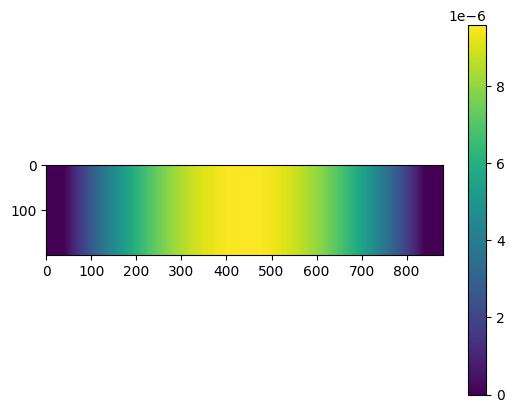

In [44]:
np_path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\lens_lowres_half.npy"
arr = np.load(np_path)

print(arr.shape)
plt.imshow(arr)
plt.colorbar()
plt.show()

(881, 200)


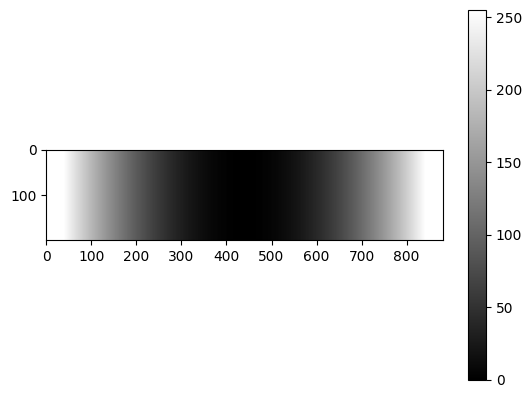

In [47]:
img_path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\lens_lowres_half.bmp"

from PIL import Image

img = Image.open(img_path)

print(img.size)
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()